In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def train_test_model(X, y):
    X = X.drop(columns = ['user'])
    
    print("Realiza split para treinamento e avaliacao")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)
    
    print("=" * 20)
    print("MODELO")
    print(" -> Instancia modelo")
    model = RandomForestClassifier(n_jobs = 8)
    
    print(" -> Treina modelo")
    model.fit(X_train, y_train)
    print(" -> Modelo gera predições")
    predictions = model.predict(X_test)    
    
    print("=" * 20)
    print(" -> AVALIAÇÃO DO MODELO")
    cross_val = cross_val_score(estimator = model, X = X_test, y = y_test, cv=10)
    print("Accuracy: %0.3f (+/- %0.3f)" % (cross_val.mean(), cross_val.std() * 2))
    
    print(classification_report(y_test, predictions))
    
    

    return confusion_matrix(y_test, predictions)

# 1.Imports iniciais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Dados

## 2.1 Extraindo os dados

In [3]:
DATA_PATH = r'C:\Users\Victo\Documents\_Estudo\MachineLearning\Udemy\Machine Learning Pratical\4.Churn Rate Minimizer\data'
DATA_FILE = '\churn_data.csv'

data = pd.read_csv(DATA_PATH + DATA_FILE)

In [4]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


## 2.2 Analisando os dados

In [5]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [6]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


## 2.3 Lidando com valores N/A

In [7]:
# Listando colunas com valores N/A
data.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
data.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [9]:
data.shape

(27000, 31)

In [10]:
# Coluna indica a quantidade de recompensas recebidas, valores em branco querem dizer que nenhuma recompensa foi recebida,
# consequentemente faz sentido manter esta coluna
data['rewards_earned'] = data['rewards_earned'].fillna(0)

In [11]:
# Coluna indica o score de crédito de uma pessoa, a falta da informação indica que a pessoa simplesmente não informou este dado.
# Não faz sentido avaliar esta coluna tendo em mente que alguma informação pode estar sendo omitda.
# Também não faz sentido remover os registros que não apresentam esta informação pelo fato de a quantidade
# de registros sem preenchimentos representam uma grande quantidade de registros do dataset, podendo tornar o modelo tendencioso

data = data.drop(columns=['credit_score'])

In [12]:
# Coluna indica a idade do usuário, como somente 4 registros não apresentam valores, remover estes registros não afetará no
# desempenho do modelo.

data = data[pd.notnull(data['age'])]

In [13]:
data.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
rewards_earned             0
reward_rate                0
is_referred                0
dtype: int64

In [14]:
X = data.drop(columns = ['churn'])
y = data['churn']

## 2.4 Visualizando os dados

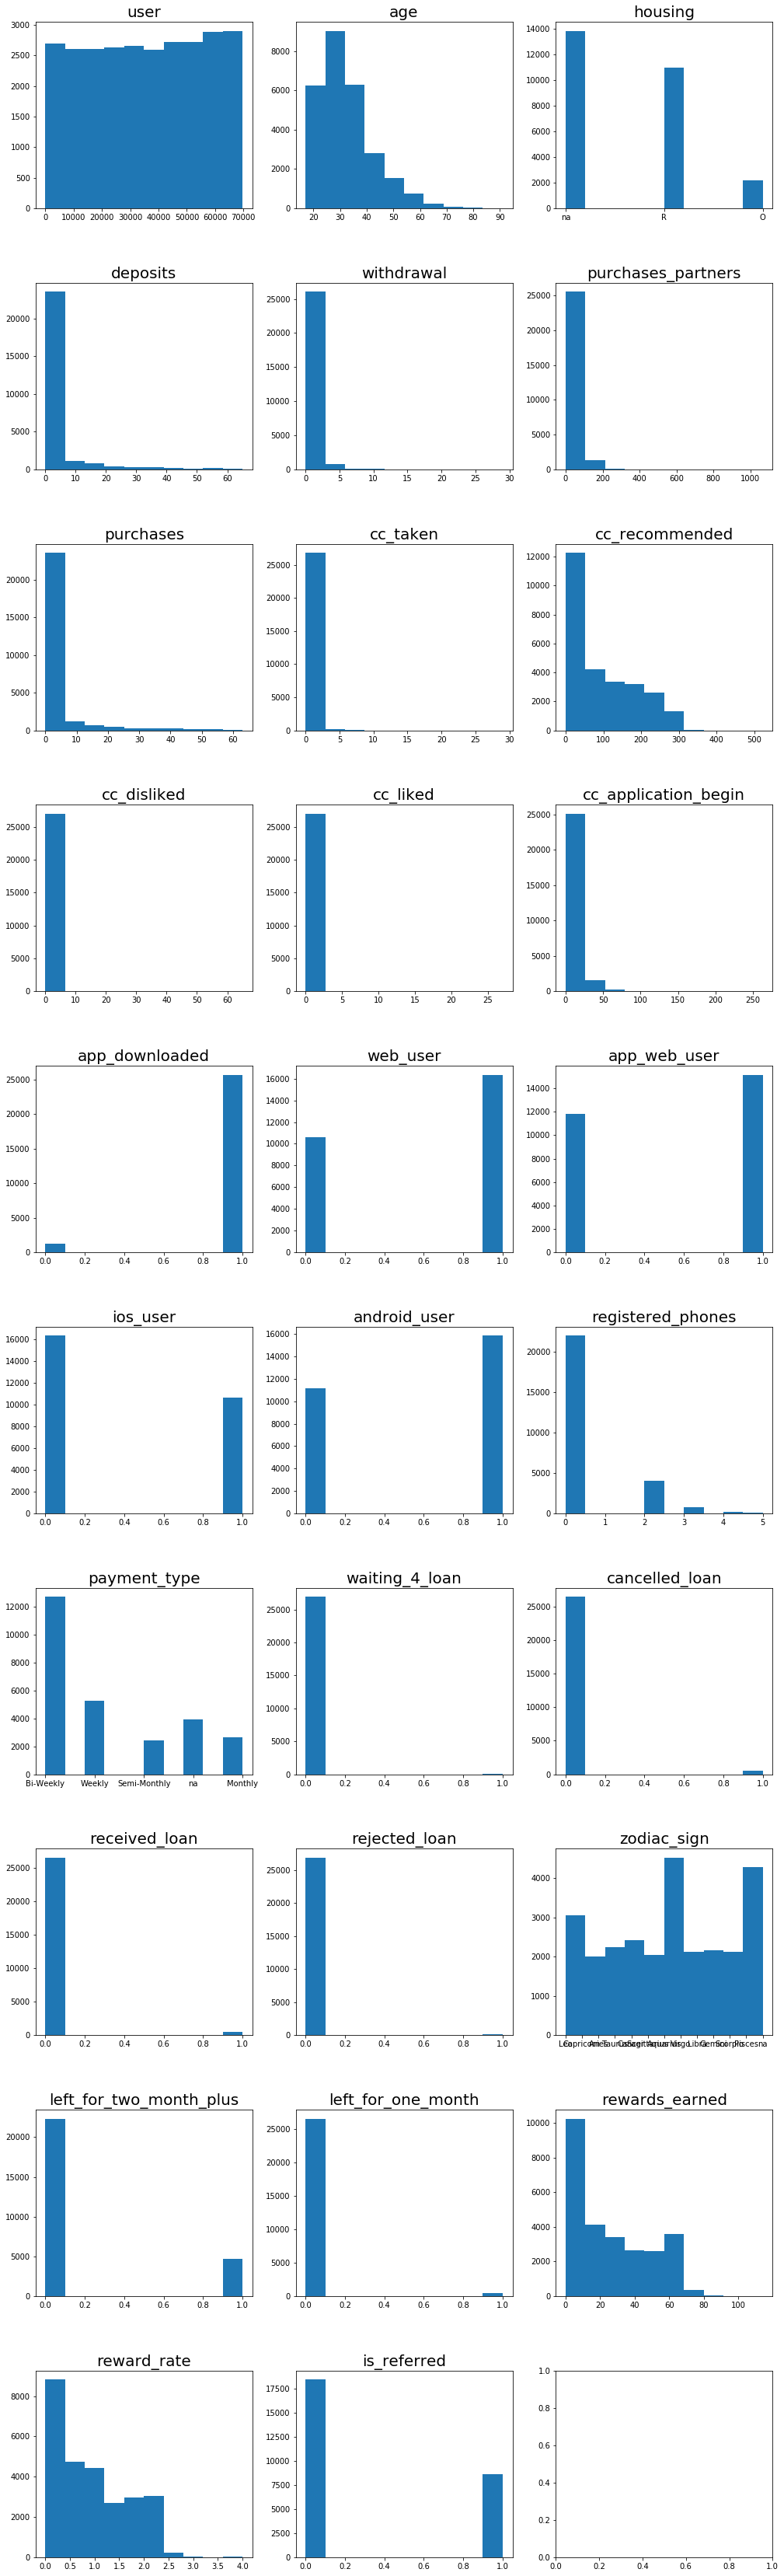

In [15]:
#Definindo o tamanho do grid de imagens
grid_length = 10
grid_width = 3


columns_to_visualize = X.columns

# A função subplots() retorna uma figure object e os axes do mesmo
# com o uso dos axes é possível preencher uma posição pré-definida 
# no que será apresentado como um grid de imagens

fig, axes = plt.subplots(grid_length, grid_width, figsize=(17,60))

axes = axes.ravel()


for i in np.arange(0, len(columns_to_visualize)):    
    axes[i].hist(X[columns_to_visualize[i]]) 
    axes[i].set_title(columns_to_visualize[i], fontsize = 20)
    
plt.subplots_adjust(hspace=0.4)   

(array([3056., 2001., 2236., 2424., 2056., 4527., 2128., 2168., 2118.,
        4282.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

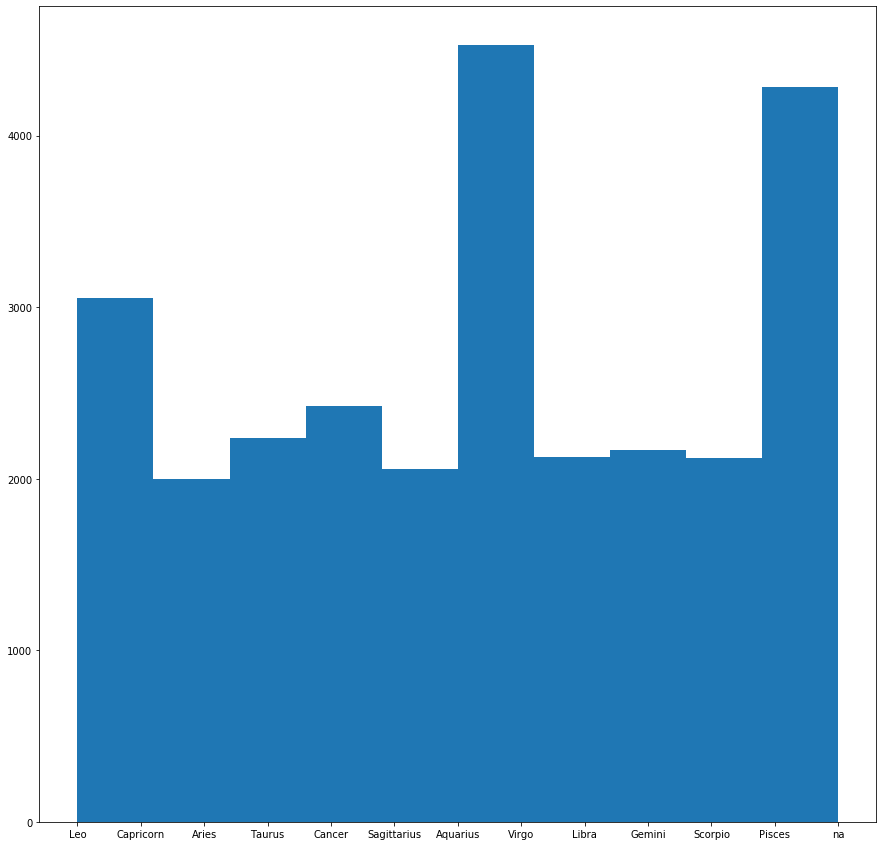

In [16]:
plt.figure(figsize=(15,15))
plt.hist(X['zodiac_sign'])

(array([8539., 3314., 2842., 2252., 2006., 1931., 1870., 2186., 1805.,
         223.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <a list of 10 Patch objects>)

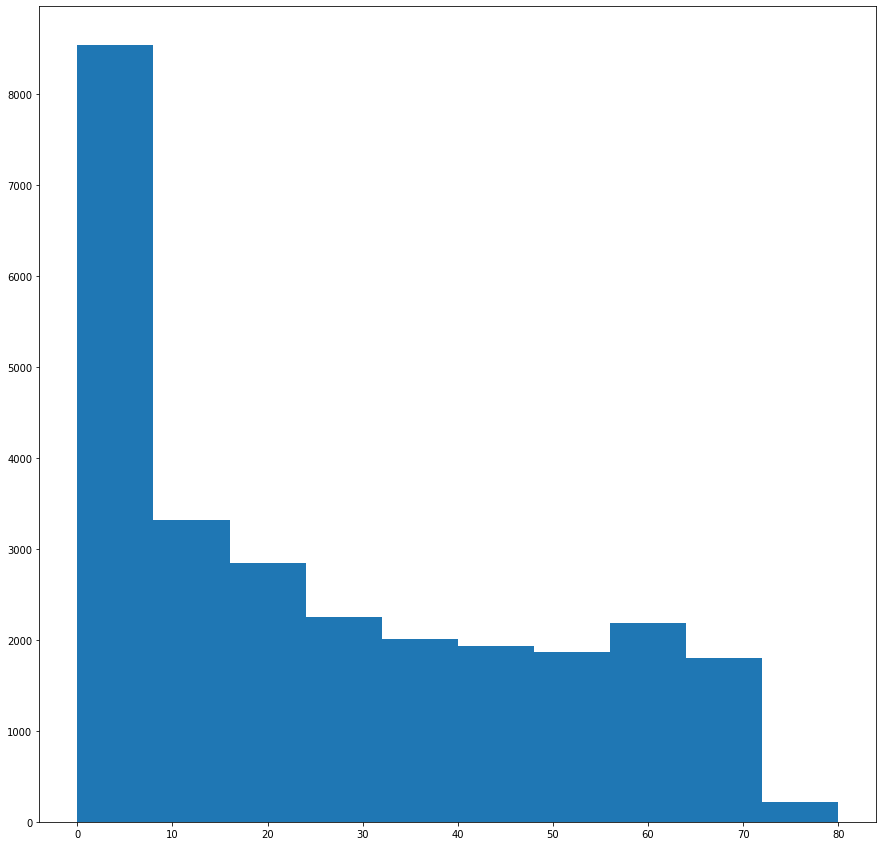

In [17]:
plt.figure(figsize=(15,15))
plt.hist(X['rewards_earned'], range = (0,80))

(array([11612.,  4050.,  2802.,  2058.,  1492.,  1153.,   806.,   665.,
          488.,   487.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

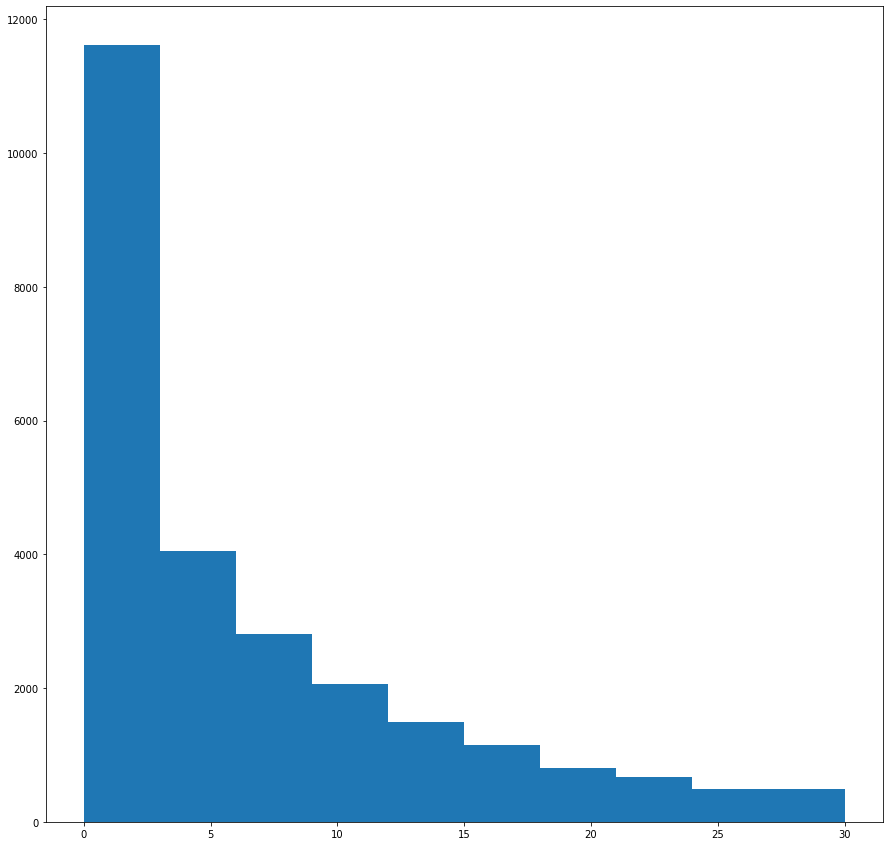

In [18]:
plt.figure(figsize=(15,15))
plt.hist(X['cc_application_begin'], range = (0,30))

In [19]:
cat_cols = [cols for cols in X.columns if X[cols].dtype=='object']

In [20]:
cat_cols

['housing', 'payment_type', 'zodiac_sign']

In [21]:
X[cat_cols].nunique()

housing          3
payment_type     5
zodiac_sign     13
dtype: int64

In [22]:
X.zodiac_sign.astype('category')

0              Leo
1              Leo
2        Capricorn
3        Capricorn
4            Aries
           ...    
26995          Leo
26996       Cancer
26997       Taurus
26998        Aries
26999       Cancer
Name: zodiac_sign, Length: 26996, dtype: category
Categories (13, object): [Aquarius, Aries, Cancer, Capricorn, ..., Scorpio, Taurus, Virgo, na]

In [23]:
X['zodiac_sign'] = X.zodiac_sign.astype('category')

In [24]:
X['zodiac_sign'] = X.zodiac_sign.cat.codes

In [25]:
X['zodiac_sign'].dtype

dtype('int8')

In [26]:
X.shape

(26996, 29)

In [27]:
X = pd.get_dummies(X)

In [28]:
X.shape

(26996, 35)

In [29]:
# cm = train_test_model(X,y)

In [30]:
#sns.heatmap(cm, annot=True)

NameError: name 'cm' is not defined

# Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
import time

X_hyper = X.drop(columns = ['user'])
    
print("Realiza split para treinamento e avaliacao")
X_train, X_test, y_train, y_test = train_test_split(X_hyper, y, test_size = 0.2, random_state = 12345)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

grid_param = {
    'n_estimators' : [100, 250, 500, 750, 1000],
    'criterion' : ['gini','entropy'],
    'max_depth' : [1, 5, 10, 25, 50],
    'oob_score' : [True, False],
}

model = RandomForestClassifier(random_state = 12345)

grid_search = GridSearchCV(estimator = model,
                           param_grid = grid_param,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = 8)


t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()

print(f'Tempo de execução de GridSearch:{t1 - t0}')
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_

print(f'Accuracy --> {rf_best_accuracy}')
print(f'Melhores parametros --> {rf_best_parameters}')

Realiza split para treinamento e avaliacao
Tempo de execução de GridSearch:3477.145791053772
Accuracy --> 0.7292107114061722
Melhores parametros --> {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 1000, 'oob_score': True}


In [34]:
model_2 = RandomForestClassifier(criterion='gini',
                                 max_depth = 25,
                                 n_estimators = 1000,
                                 oob_score = True,
                                 random_state = 12345)

print(" -> Treina modelo")
model_2.fit(X_train, y_train)
print(" -> Modelo gera predições")
predictions_2 = model_2.predict(X_test)    

print("=" * 20)
print(" -> AVALIAÇÃO DO MODELO")
cross_val = cross_val_score(estimator = model_2, X = X_test, y = y_test, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (cross_val.mean(), cross_val.std() * 2))

print(classification_report(y_test, predictions_2))


 -> Treina modelo
 -> Modelo gera predições
 -> AVALIAÇÃO DO MODELO
Accuracy: 0.705 (+/- 0.043)
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      3137
           1       0.74      0.59      0.65      2263

    accuracy                           0.74      5400
   macro avg       0.74      0.72      0.72      5400
weighted avg       0.74      0.74      0.73      5400



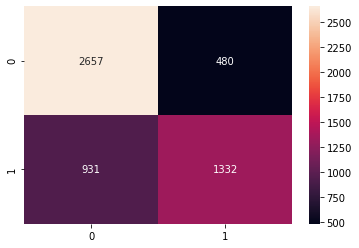

In [35]:
cm = confusion_matrix(y_test, predictions_2)
sns.heatmap(cm, annot = True, fmt ='g')